**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import itertools

from sklearn.neighbors import KNeighborsClassifier

**We have collected air quality dataset from UCI machine learning repository**(https://archive.ics.uci.edu/ml/datasets/Air+Quality). 

**Pre-processed air quality dataset stored in csv file is loaded using pandas pd.read_csv() function.**

In [4]:
data = pd.read_csv('/CMPE295_Final_Preprocessed_Data.csv')

In [5]:
label=data['labels']

In [6]:
data.iloc[:, :-1]

,co,no2,o3,temperature,humidity
0,1360.00,113.0,1267.50,13.600,48.875001
1,1292.25,92.0,972.25,13.300,47.700000
2,1402.00,114.0,1074.00,11.900,53.975000
3,1375.50,122.0,1203.25,11.000,60.000000
4,1272.25,116.0,1110.00,11.150,59.575001
...,...,...,...,...,...
9352,1314.25,189.8,1728.50,21.850,29.250000
9353,1162.50,179.2,1269.00,24.325,23.725000
9354,1142.00,174.7,1092.00,26.900,18.350000
9355,1002.50,155.7,769.75,28.325,13.550000


In [7]:
#X_data=data[['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]

In [8]:
data.describe

<bound method NDFrame.describe of            co    no2       o3  temperature   humidity  labels
0     1360.00  113.0  1267.50       13.600  48.875001       1
1     1292.25   92.0   972.25       13.300  47.700000       0
2     1402.00  114.0  1074.00       11.900  53.975000       1
3     1375.50  122.0  1203.25       11.000  60.000000       1
4     1272.25  116.0  1110.00       11.150  59.575001       1
...       ...    ...      ...          ...        ...     ...
9352  1314.25  189.8  1728.50       21.850  29.250000       1
9353  1162.50  179.2  1269.00       24.325  23.725000       1
9354  1142.00  174.7  1092.00       26.900  18.350000       0
9355  1002.50  155.7   769.75       28.325  13.550000       0
9356  1070.75  167.7   816.00       28.500  13.125000       0

[9357 rows x 6 columns]>

**Dropping the labels column**

In [9]:
X_data = data.drop(columns=['labels'])
X_data

,co,no2,o3,temperature,humidity
0,1360.00,113.0,1267.50,13.600,48.875001
1,1292.25,92.0,972.25,13.300,47.700000
2,1402.00,114.0,1074.00,11.900,53.975000
3,1375.50,122.0,1203.25,11.000,60.000000
4,1272.25,116.0,1110.00,11.150,59.575001
...,...,...,...,...,...
9352,1314.25,189.8,1728.50,21.850,29.250000
9353,1162.50,179.2,1269.00,24.325,23.725000
9354,1142.00,174.7,1092.00,26.900,18.350000
9355,1002.50,155.7,769.75,28.325,13.550000


In [10]:
X=X_data.to_numpy()
Y=label.to_numpy()

**Dataset Split**

We have made use of K-fold cross validation. It is a resampling procedure used to evaluate machine learning models by spliting the data into k-1 train sets and 1 test set.

We have trained three models SVM, KNN and Logestic Regression

# **SVM**

In [11]:
svc_plot=[]
svc_x =[]
svc_y=[]


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
splits =2
kf = KFold(n_splits=splits)
kf.get_n_splits(X)
 

#print(kf)
average_accuracy =0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    #print("f1_score of classification : {0} %".format(score*100))
    #print(cm_lr)
    average_accuracy=average_accuracy+(acc_lr*100)
average_accuracy=average_accuracy/splits
print(average_accuracy)
svc_x.append('2')
svc_y.append(average_accuracy)


Accuracy of classification : 99.61530241504595 %
Accuracy of classification : 99.59384352287303 %
99.60457296895949


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
splits =3
kf = KFold(n_splits=splits)
kf.get_n_splits(X)
 

#print(kf)
average_accuracy =0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    #print("f1_score of classification : {0} %".format(score*100))
    #print(cm_lr)
    average_accuracy=average_accuracy+(acc_lr*100)
average_accuracy=average_accuracy/splits
print(average_accuracy)
svc_x.append('3')
svc_y.append(average_accuracy)


Accuracy of classification : 99.83969220904136 %
Accuracy of classification : 99.87175376723309 %
Accuracy of classification : 99.35876883616544 %
99.69007160414662


In [14]:
svc_plot.append(svc_x)
svc_plot.append(svc_y)

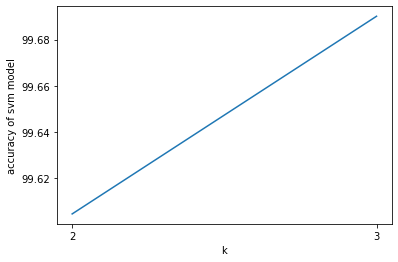

In [15]:
plt.xlabel('k')
plt.ylabel('accuracy of svm model')
plt.plot(svc_x, svc_y)

# **KNN**

In [16]:
knn_plot = []
knn_x = []
knn_y = []

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=2)
kf.get_n_splits(X)

leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    knn_2 = KNeighborsClassifier()
    #Use GridSearch
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    print(clf)
    best_model = clf.fit(x_train,y_train)
    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best leaf_size: 1
Best p: 2
Best n_neighbors: 7
GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=No

In [18]:
from sklearn.neighbors import KNeighborsClassifier
splits = 2
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

#print(kf)
average_accuracy =0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = KNeighborsClassifier(n_neighbors=9, leaf_size=1,p=2)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)
    average_accuracy=average_accuracy+(acc_lr*100)
average_accuracy=average_accuracy/splits
print(average_accuracy)
knn_x.append('2')
knn_y.append(average_accuracy)

Accuracy of classification : 99.63667450309896 %
f1_score of classification : 99.51877240166408 %
[[3489   13]
 [   4 1173]]
Accuracy of classification : 99.48696023941855 %
f1_score of classification : 99.46420768766903 %
[[2809    9]
 [  15 1845]]
99.56181737125875


In [19]:
from sklearn.neighbors import KNeighborsClassifier
splits = 3
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

#print(kf)
average_accuracy = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = KNeighborsClassifier(n_neighbors=9, leaf_size=1,p=2)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)
    average_accuracy=average_accuracy+(acc_lr*100)
average_accuracy=average_accuracy/splits
print(average_accuracy)
knn_x.append('3')
knn_y.append(average_accuracy)

Accuracy of classification : 99.5511381853158 %
f1_score of classification : 99.45265831619416 %
[[2214    8]
 [   6  891]]
Accuracy of classification : 99.67938441808272 %
f1_score of classification : 99.63221386734136 %
[[2113    2]
 [   8  996]]
Accuracy of classification : 99.48701506893235 %
f1_score of classification : 99.4467945477603 %
[[1972   11]
 [   5 1131]]
99.57251255744363


In [20]:
from sklearn.neighbors import KNeighborsClassifier
splits = 5
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

#print(kf)
average_accuracy = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = KNeighborsClassifier(n_neighbors=9, leaf_size=1,p=2)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)
    average_accuracy=average_accuracy+(acc_lr*100)
average_accuracy=average_accuracy/splits
print(average_accuracy)
knn_x.append('5')
knn_y.append(average_accuracy)

Accuracy of classification : 99.57264957264957 %
f1_score of classification : 99.5168857713569 %
[[1250    5]
 [   3  614]]
Accuracy of classification : 99.83974358974359 %
f1_score of classification : 99.75912451023913 %
[[1476    0]
 [   3  393]]
Accuracy of classification : 99.51897381079637 %
f1_score of classification : 99.44526747832411 %
[[1272    0]
 [   9  590]]
Accuracy of classification : 99.4655264564404 %
f1_score of classification : 99.45424527751526 %
[[1065    5]
 [   5  796]]
Accuracy of classification : 99.41207910208445 %
f1_score of classification : 99.34008119364469 %
[[1239    8]
 [   3  621]]
99.56179450634288


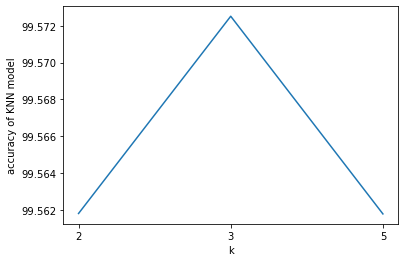

In [21]:
plt.xlabel('k')
plt.ylabel('accuracy of KNN model')
plt.plot(knn_x, knn_y)

# **Logisitic Regression**

In [22]:
lr_plot = []
lr_x = []
lr_y = []

In [23]:
import numpy as np
from sklearn.model_selection import KFold
average_accuracy=0
splits = 2
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred) 
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    average_accuracy=average_accuracy+acc_lr
    print(cm_lr)
average_accuracy=average_accuracy/splits
print(average_accuracy)
lr_x.append('2')
lr_y.append(average_accuracy)

Accuracy of classification : 97.77730284248771 %
f1_score of classification : 97.05849070837628 %
[[3444   58]
 [  46 1131]]
Accuracy of classification : 93.56562633604103 %
f1_score of classification : 93.33455557936615 %
[[2624  194]
 [ 107 1753]]
0.9567146458926438


In [24]:
import numpy as np
from sklearn.model_selection import KFold
average_accuracy=0
splits = 3
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    average_accuracy=average_accuracy+acc_lr 
    print(cm_lr)
average_accuracy=average_accuracy/splits
print(average_accuracy)
lr_x.append('3')
lr_y.append(average_accuracy)

Accuracy of classification : 97.5953831356204 %
f1_score of classification : 97.0349550189019 %
[[2200   22]
 [  53  844]]
Accuracy of classification : 96.5694132734851 %
f1_score of classification : 96.0098575587071 %
[[2090   25]
 [  82  922]]
Accuracy of classification : 96.47322859890991 %
f1_score of classification : 96.22420365903048 %
[[1905   78]
 [  32 1104]]
0.9687934166933846


In [25]:
import numpy as np
from sklearn.model_selection import KFold
average_accuracy=0
splits = 5
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred) 
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    average_accuracy=average_accuracy+acc_lr
    print(cm_lr)
average_accuracy=average_accuracy/splits
print(average_accuracy)
lr_x.append('5')
lr_y.append(average_accuracy)

Accuracy of classification : 98.29059829059828 %
f1_score of classification : 98.04458186224329 %
[[1252    3]
 [  29  588]]
Accuracy of classification : 97.86324786324786 %
f1_score of classification : 96.78533894754196 %
[[1458   18]
 [  22  374]]
Accuracy of classification : 98.23623730625334 %
f1_score of classification : 97.94917427883298 %
[[1269    3]
 [  30  569]]
Accuracy of classification : 96.73971138428648 %
f1_score of classification : 96.6661087347887 %
[[1044   26]
 [  35  766]]
Accuracy of classification : 97.22073757349011 %
f1_score of classification : 96.89139103317825 %
[[1214   33]
 [  19  605]]
0.9767010648357521


In [26]:
import numpy as np
from sklearn.model_selection import KFold
average_accuracy=0
splits = 7
kf = KFold(n_splits=splits)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred) 
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    average_accuracy=average_accuracy+acc_lr
    print(cm_lr)
average_accuracy=average_accuracy/splits
print(average_accuracy)
lr_x.append('7')
lr_y.append(average_accuracy)

Accuracy of classification : 98.13014210919971 %
f1_score of classification : 97.93605187873308 %
[[861   1]
 [ 24 451]]
Accuracy of classification : 98.27973074046372 %
f1_score of classification : 97.45852992927917 %
[[1037    8]
 [  15  277]]
Accuracy of classification : 98.72849663425579 %
f1_score of classification : 97.89929286328906 %
[[1080    7]
 [  10  240]]
Accuracy of classification : 97.23261032161555 %
f1_score of classification : 96.7656856303183 %
[[904   7]
 [ 30 396]]
Accuracy of classification : 96.48466716529543 %
f1_score of classification : 96.48353407092249 %
[[657  11]
 [ 36 633]]
Accuracy of classification : 97.0059880239521 %
f1_score of classification : 96.77157438911227 %
[[828  33]
 [  7 468]]
Accuracy of classification : 97.45508982035929 %
f1_score of classification : 97.13590335313181 %
[[874  12]
 [ 22 428]]
0.9761667497359167


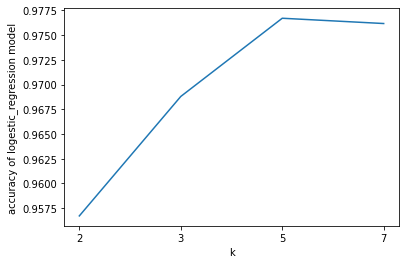

In [27]:
plt.xlabel('k')
plt.ylabel('accuracy of logestic_regression model')
plt.plot(lr_x, lr_y)

In [28]:
accuracy_x = ["svm", "knn", "LR"];
accuracy_y = [99.69, 99.56, 97.61];

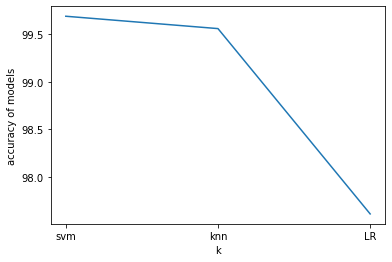

In [29]:
plt.xlabel('k')
plt.ylabel('accuracy of models')
plt.plot(accuracy_x, accuracy_y)

In [30]:
# Save logistic regression model

In [31]:
from joblib import dump, load
dump(model, 'CMPE295_Asthma_Risk_Prediction_Model_20201202.joblib')

['CMPE295_Asthma_Risk_Prediction_Model_20201202.joblib']